In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
 
def survey(results, category_names):
    """
    Parameters
    ----------
    results : 字典
        案例的数据源，且字典值的长度与category_names对应
    category_names : 字符串列表
        每个种类的标签
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))
 
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
 
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        widths = widths.round(decimals=2)
        starts = data_cum[:, i] - widths
        rects = ax.barh(i, widths, left=starts, height=0.4,
                        label=colname, color=color)
 
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='edge', color='black', fontsize=10)
    plt.legend(ncol=len(category_names), bbox_to_anchor=(0, 0),
                loc='lower left', fontsize='small')
    plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], category_names, rotation=30)
    plt.xlabel('Time (seconds)')
 

category_names = ['Load', 'Preprocess', 'LR Train', 'LR Test', 'NB Train', 'NB Test', 'DT Train', 'DT Test', 'RF Train', 'RF Test']

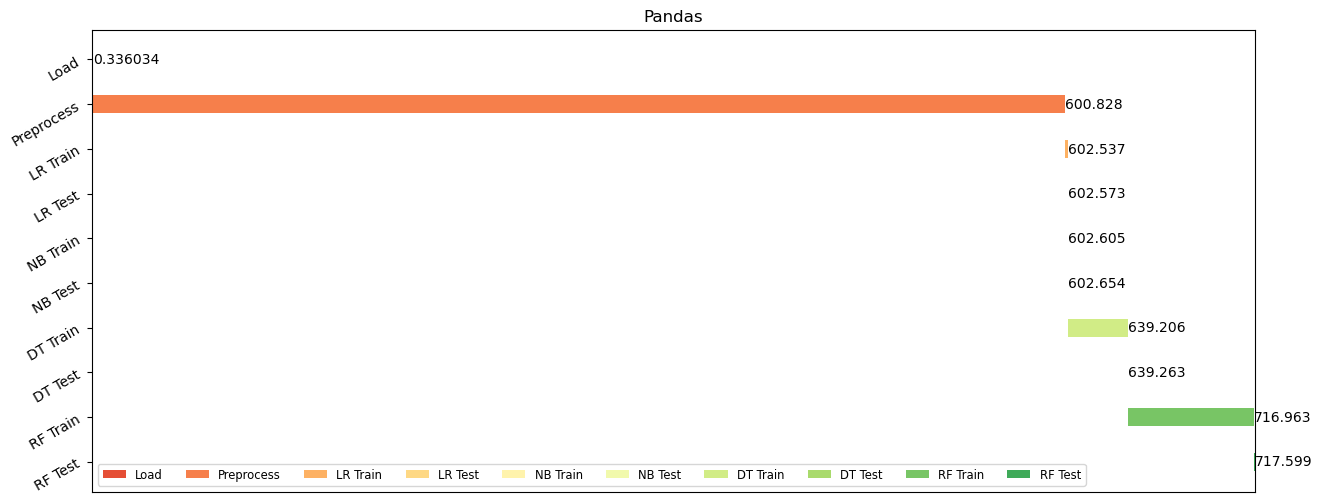

In [2]:
results = {'Pandas' : [0.336034, 600.492034, 1.709015, 0.035807, 0.032000, 0.048730, 36.552494, 0.057315, 77.699702, 0.635480]}
survey(results, category_names)

plt.title('Pandas')
plt.show()

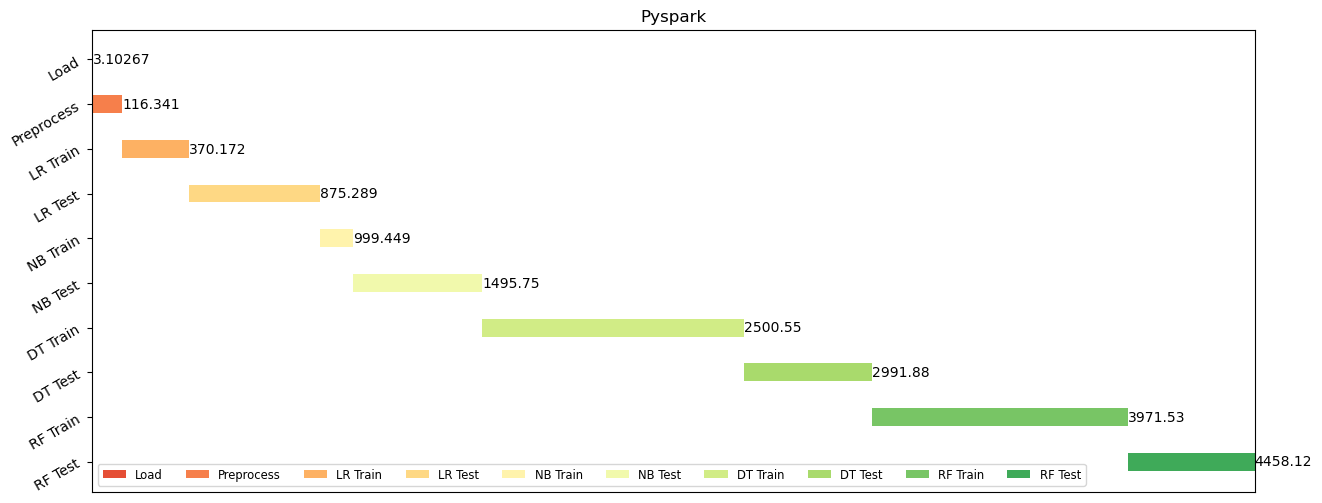

In [3]:
results = {'Pyspark': [3.102666, 113.238041, 253.831758, 505.116503, 124.160454, 496.299950, 1004.800764, 491.334588, 979.649127, 486.588434]}
survey(results, category_names)

plt.title('Pyspark')
plt.show()